# TP Initiation à l'apprentissage par renforcement avec OpenAI-Gym

Dans ce TP, vous allez mettre en oeuvre un algorithme simple d'apprentissage par renforcement pour optimiser un agent qui joue à un jeu vidéo.

On va utiliser un simulateur d'une ancienne console Atari et controler le gamepad par notre algorithme. Voici la console:

<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/Atari-2600-Wood-4Sw-Set.jpg/1920px-Atari-2600-Wood-4Sw-Set.jpg' width="30%" >

L'API python qui nous permet de faire ça s'appelle [Gym](https://www.gymlibrary.dev/), développée par OpenAI.
Elle permet de simuler un certain nombre de [jeux Atari](https://www.gymlibrary.dev/environments/atari/complete_list/)


Pour implémenter notre agent joueur, nous allons utiliser l'Apprentissage par Renforcement, dans lequel notre agent choisira les actions à faire à chaque pas de temps (appuyer sur le gamepad, se diriger vers le haut, le bas, etc...). En fonction de ces actions, le simulateur de jeu (qu'on appelle l'environnement) mettra à jour l'écran de jeu, et transmettra à l'agent un ''vecteur d'observation'' pour le renseigner sur le nouvel état du jeu, ainsi qu'une récompense qui est un nombre qui indique à l'agent s'il gagne ou s'il perd.


<img src='https://images.ctfassets.net/xjan103pcp94/5h5ZwNAqLHAIRZ9jPGvRU1/6ceb65f718883cf2e7b8ca9dcd0a5fc4/Blog_-_intro_reinforcement_2.png' width="50%">

Lisez la section [Interacting with the environment](https://www.gymlibrary.dev/content/basic_usage/) de la librairie Gym. Dans cette section, on voit le code de base de tout agent utilisant la librairie Gym, qui ici, joue des actions tirées au hasard. Le but du TP sera de créer un agent qui d'abord joue des actions tirées au hasard, puis sélectionne ses actions de mieux en mieux pour que les récompenses qu'il obtienne soit les plus grandes possibles.


Nous nous intéressons d'abord au jeu MsPacMan [MsPacMan](https://www.gymlibrary.dev/environments/atari/ms_pacman/). Selon que l'on charge plutot l'environnement nommé `MsPacman-v5` ou `MsPacman-ram-v5`, le vecteur d'observation renvoyée par l'environnement à l'agent sera soit l'image complete de l'écran, soit le contenu complet de la RAM (128 octets), sous forme de tableau Numpy.

## Chargement des Librairies, et Fonctions Utiles

In [ ]:
%pip install -U gym>=0.21.0
%pip install -U gym[atari,accept-rom-license]
%pip install -U imageio


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.6 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 KB 34.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 74.8 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.0-py3-none-any.whl size=446686 sha256=af30d9ae44e7644a5c0e85542e3bc616f635fa525454ef2ff9e5bb0ae4bcc7a5
  Stored in directory: /root/.cache/pip/wheels/7d/17/c9/c31922a6aaf4ec7ec9

In [ ]:
from IPython.display import clear_output,Image
import matplotlib.pyplot as plt 
import imageio,time,random,os,shutil
import numpy as np
import gym

In [19]:
def reset_image_folder():
  if os.path.exists('imgs'): shutil.rmtree('imgs')
  os.mkdir('imgs')

def show_animation():
  i = 0
  fnames = []
  while os.path.exists(f'imgs/env_{i}.png'):
    fnames.append(f'imgs/env_{i}.png')
    i+=1
  imageio.mimsave('imgs/anim.gif', [imageio.imread(fname) for fname in fnames])
  return Image('imgs/anim.gif')



def gifMax():
  i = 0
  fnames = []
  while os.path.exists(f'imgs/env_{i}.png'):
    fnames.append(f'imgs/env_{i}.png')
    i+=1
  imageio.mimsave('animMax.gif', [imageio.imread(fname) for fname in fnames])

## Boucle principale de l'agent

dans le code ci-dessous, un agent joue à MsPacMan pour au plus 2000 pas de temps. Chacune de ses actions est tirée au hasard parmis ces quatres: se diriger vers le haut, à gauche, à droite ou en bas. A chaque pas de temps, l'image de l'écran est enregistré automatiquement dans le répertoire `imgs` puis ces images sont assemblées dans le fichier `anim.gif` que la fonction `show_animation()` affiche.

- Exécutez ce code, et lisez-le bien

In [20]:
reset_image_folder()

env = gym.make("ALE/MsPacman-ram-v5",render_mode='rgb_array')

observation = env.reset()

t=0
for i in range(2000):
    # your agent goes here
    action = random.choice([1,2,3,4])
    observation, reward, done, truncated, info = env.step(action)

    
    if done or truncated:
      break

    env_screen = env.render()

    # the first 66 timesteps in MsPacman are useless
    if i > 66:
      plt.imsave(f'imgs/env_{t}.png',env_screen)
      t += 1
    

env.close()

<ipython-input-3-d24ac672afca>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imageio.mimsave('imgs/anim.gif', [imageio.imread(fname) for fname in fnames])


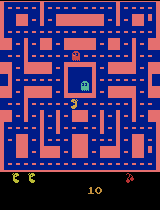

In [ ]:
show_animation()

## Notation et Vocabulaire

On appelle un *épisode* le déroulement du jeu jusqu'à ce que l'agent meurt ou que le temps limite soit atteint.
Le code ci-dessus ne simule qu'un seul épisode.

On note
- $T$ la durée total de l'épisode actuel.
- $r_t$ la récompense que l'agent obtient au temps $t$ dans l'épisode actuel.
- $R_t$ est la récompense cumulée de l'agent du temps $t$ au temps $T$ dans l'épisode actuel. Formellement, $R_t=\sum_{t'=t}^{T} r_{t'}$
- $a_t$ l'action qu'il choisit au temps $t$ dans l'épisode actuel.
- $s_t$ le vecteur d'observation au temps $t$ dans l'épisode actuel.


## Episodes multiples

- Faites une boucle autour du code précédent pour lancer $K=10$ épisodes. Chaque épisode correspond à une nouvelle partie de MsPacMan. On notera $T_k$, $r_{t,k}$, $R_{t,k}$, $a_{t,k}$ $s_{t,k}$ les durées, récompenses, récompenses cumulées, actions, observations au temps $t$ de l'épisode $k$.

## Evaluation de la stratégie aléatoire

On va d'abord évaluer la qualité de la stratégie aléatoire. 

- Modifiez le code pour stocker $T_k$, $r_{t,k}$, $R_{t,k}$, $a_{t,k}$ $s_{t,k}$ dans 5 grands tableaux `numpy`. Pour calculer $R_{t,k}$, vous pouvez faire appel à la fonction `numpy.cumsum`.

- Affichez la récompense moyenne obtenue au temps $t=0$. Formellement, il s'agit de $\frac{1}{K} \sum_{k=1}^K R_{0,k}$

## La fonction $q$

On appelle $q(s,a)$ la récompense cumulée qu'on obtiendra dans le futur en moyenne si le vecteur d'observation courante est $s$, que l'action prise actuellement est $a$, et que les actions ultérieurs suivent ensuite la stratégie voulue (aléatoire dans notre cas). Nous souhaitons estimer $q(s,a)$. Comme il y a un très grand nombre de vecteurs d'observations, on ne peut pas estimer $q(s,a)$ en comptant. Dans ce TP, nous ferons l'hypothèse que $q(s,a)$ peut être correctement estimée par un modèle linéaire, dont nous calculerons les paramètres par régression linéaire.

Pour chaque action $a$ possible, il y aura un vecteur $\beta_a$ de même dimension que l'observation (ici 128 dimensions), ce qui nous permettra d'estimer 
$q(s,a)=\beta_{a}^\top s$. Comment apprendre ces vecteurs ?

Soit $I_{a,k}$ l'ensemble des pas de temps de l'épisode $k$ dans
lesquels l'action $a$ a été choisie.

Si pour un épisode $k$, le temps $t \in I_{a,k}$ alors $R_{t,k}$ devrait s'approcher de $q(s,a)$.

Traduisons cela en problème de régression: Pour chaque action $a$, on aura le un problème de régression linéaire suivant:

$\beta_{a}=\arg\min\sum_{k=1}^{K}\sum_{t\in I_{a,k}}\left(\beta_{a}^{\top}s_{t,k}-R_{t,k}\right)^{2}$

- calculez ces vecteurs $\beta_a$ sur les données de simulation.
- Evaluez la qualité de votre approximation en calculant le score $r2$.

## Implémentation de la stratégie $\epsilon$-greedy

Nous avons calculé $q(s,a)$ qui permet d'estimer la récompense cumulée qu'on obtiendra dans l'état courant si on choisi l'action $a$.

Si $q(s,a)$ représentait parfaitement cette récompense cumulée, alors une bonne stratégie serait à chaque pas de temps de choisir l'action $a_t = \arg \max_a q(s_t,a)$.
Néanmoins, du fait que $q(s,a)$ n'est pas parfait, nous implémenterons une stratégie intermédiaire entre l'aléatoire et celle-ci. Cette stratégie s'appelle $\epsilon$-greedy. Elle fonctionne comme suit:

A chaque pas de temps $t$, avec une probabilité $1-\epsilon$, choisir une action aléatoire, et avec une probabilité $\epsilon$, choisir l'action $\arg \max_a q(s_t,a)$

- Implémentez cette stratégie à partir des $q(s,a)$ évalués par régression linéaire.
- Evaluez cette stratégie. Constatez-vous une amélioration comparée à la stratégie purement aléatoire ?

## Itération de la politique

On appelle **algorithme d'itération de la politique** un algorithme qui met en place une stratégie (au début aléatoire), calcule $q(s,a)$ dessus, puis déploie la stratégie $\epsilon$-greedy, puis recalcule $q(s,a)$ sur à partir de cette dernière stratégie, ce qui va conduire à améliorer la stratégie $\epsilon$-greedy au fur et à mesure des itérations.

- Mettez en place ce principe, et évaluez le résultat.

## Pour aller plus loin

- Appliquez cet algorithme à d'autres jeux ou d'autres environnement de Gym.
- Au lieu d'utiliser la RAM comme vecteur d'observation, utiliser l'image de l'écran
- Améliorez les performances de l'algorithme en rajoutant de nouvelles variables (pour augmenter le vecteur d'observation) pour estimer mieux $q(s,a)$

In [21]:
#Episodes multiples: 
K=10
for k in range(K):
  reset_image_folder()
  env = gym.make("ALE/MsPacman-ram-v5",render_mode='rgb_array')
  observation = env.reset()
  t=0
  for i in range(2000):
      # your agent goes here
      action = random.choice([1,2,3,4])
      observation, reward, done, truncated, info = env.step(action)
      if done or truncated:
        break

      env_screen = env.render()
      # the first 66 timesteps in MsPacman are useless
      if i > 66:
        plt.imsave(f'imgs/env_{t}.png',env_screen)
        t += 1
  env.close()



In [ ]:
show_animation()


In [22]:
#Evaluation de la stratégie aléatoire: 
#Episodes multiples: 
K=10
T=np.array([])
R=np.zeros((K,2000))
r=np.zeros((K,2000))
a=np.zeros((K,2000))
s=np.zeros((10, 2000, 128))

for k in range(K):
  j = 0
  reset_image_folder()
  env = gym.make("ALE/MsPacman-ram-v5",render_mode='rgb_array')
  observation = env.reset()
  t=0


  for i in range(2000):
      # your agent goes here
      action = random.choice([1,2,3,4])
      observation, reward, done, truncated, info = env.step(action)
      s[k][i] = observation     
      if done or truncated or info['lives']<3:
        break
      env_screen = env.render()
      # the first 66 timesteps in MsPacman are useless
      if i > 66:
        a[k][i]= action
        r[k][i] = reward
        R[k,:] = np.cumsum(r[k][::-1])[::-1]
        plt.imsave(f'imgs/env_{t}.png',env_screen)
        t += 1


  T = np.append(T,t)
  env.close()


In [23]:
#Récompense moyenne:

recompense_moyenne_aleatoire = (1/K)*np.sum(R[:,0])
print("\n\n voici la récompense moyenne associée à la stratégie aléatoire : ", recompense_moyenne_aleatoire)



 voici la récompense moyenne associée à la stratégie aléatoire :  95.0


In [24]:
#Regression linéaire 

def regression_lineaire(s, R, action):
  x = s[a==action]
  y = R[a==action]
  beta = np.linalg.pinv(x)@y
  return(x,y,beta)

def q(obs, R, action):
  x,y,beta = regression_lineaire(obs,R,action)
  return(beta.T@obs)

x1, y1, beta1 = regression_lineaire(s,R, 1)
x2, y2, beta2 = regression_lineaire(s,R, 2)
x3, y3, beta3 = regression_lineaire(s,R, 3)
x4, y4, beta4 = regression_lineaire(s,R, 4)


In [25]:
#Evaluation de notre approximation : score

def score(x, y,beta):
  ssr = np.sum((x@beta - y)**2)
  sst = np.sum((y - np.mean(y))**2)
  r2 = 1 -(ssr/sst)
  return(r2)


score1 = score(x1, y1, beta1)
print("Voici le score associé à l'action 1 :", score1)
score2 = score(x2, y2, beta2)
print("Voici le score associé à l'action 2 :", score2)
score3 = score(x3, y3, beta3)
print("Voici le score associé à l'action 3 :", score3)
score4 = score(x4, y4, beta4)
print("Voici le score associé à l'action 4 :", score4)


Voici le score associé à l'action 1 : 0.8694890670706966
Voici le score associé à l'action 2 : 0.8620074616066462
Voici le score associé à l'action 3 : 0.8494483064740677
Voici le score associé à l'action 4 : 0.8542111481967604


In [26]:
#Implémentation de la stratégie epsilon-greedy

#Cette fonction nous permettra de choisir aléatoirement avec une probabilité espilon un évenement, et avec une probabilité (1-epsilon) un autre évenement
def bernoulli(p):
  if random.random() <= p: return 1 
  else : return 0 


epsilon = 0.5
R=np.zeros((K,2000))
r=np.zeros((K,2000))
K=10

for k in range(K):
  reset_image_folder()
  env = gym.make("ALE/MsPacman-ram-v5",render_mode='rgb_array')
  observation = env.reset()
  t=0
  action = 0
  for i in range(2000):
      observation, reward, done, truncated, info = env.step(action)
      choix = bernoulli(epsilon)
      if(choix==1) : 
        liste = [beta1.T@observation, beta2.T@observation, beta3.T@observation, beta4.T@observation]        
        action = np.argmax(liste)+1
      else : 
        action = random.choice([1,2,3,4])

      if done or truncated:
        break

      env_screen = env.render()
      # the first 66 timesteps in MsPacman are useless
      if i > 66:
        r[k][i] = reward
        R[k,:] = np.cumsum(r[k][::-1])[::-1]
        plt.imsave(f'imgs/env_{t}.png',env_screen)
        t += 1      

  env.close()




In [27]:
#Récompense moyenne:
recompense_moyenne_greedy = (1/K)*np.sum(R[:,0])
print("\nVoici la récompense moyenne associée à la stratégie epsilon greedy : ", recompense_moyenne_greedy)


Voici la récompense moyenne associée à la stratégie epsilon greedy :  477.0


In [28]:
#Itération de la politique :


epsilon = 0.5
nb = 10 #Nombre de fois où on va faire la regression 

K=10
score_max = 0
for nombre in range(nb): 

  #Episodes multiples: 
  R=np.zeros((K,2000))
  r=np.zeros((K,2000))
  s= np.zeros((K,2000,128))

  #On refait une regression linéaire sur nos nouvelles données:
  x1, y1, beta1 = regression_lineaire(s, R, 1)
  x2, y2, beta2 = regression_lineaire(s, R, 2)
  x3, y3, beta3 = regression_lineaire(s, R, 3)
  x4, y4, beta4 = regression_lineaire(s, R, 4)  
  
  for k in range(K):
    vec_observations = np.zeros((2000,128))
    reset_image_folder()
    env = gym.make("ALE/MsPacman-ram-v5",render_mode='rgb_array')
    observation = env.reset()
    t=0
    action = 0
    for i in range(2000):
        observation, reward, done, truncated, info = env.step(action)
        s[k][i] = observation     
        choix = bernoulli(epsilon)
        if(choix==1) : 

          liste = [beta1.T@observation, beta2.T@observation, beta3.T@observation, beta4.T@observation]        
          action = np.argmax(liste)+1
        else : 
          action = random.choice([1,2,3,4])

        if done or truncated:
          break

        env_screen = env.render()
        # the first 66 timesteps in MsPacman are useless
        if i > 66:
          r[k][i] = reward
          R[k,:] = np.cumsum(r[k][::-1])[::-1]
          plt.imsave(f'imgs/env_{t}.png',env_screen)
          t += 1      
        vec_observations[i]= observation

    
    if R[k,0] > score_max:
      indice_max = k
      score_max = R[k,0]
      gifMax()


    env.close()

  #Récompenses moyennes:
  recompense_moyenne_politique = (1/K)*np.sum(R[:,0])
  print("\nLa récompense moyenne associée à l'itération", nombre+1, " est :", recompense_moyenne_politique)

  
 





<ipython-input-19-d24ac672afca>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imageio.mimsave('animMax.gif', [imageio.imread(fname) for fname in fnames])



La récompense moyenne associée à l'itération 1  est : 239.0

La récompense moyenne associée à l'itération 2  est : 262.0

La récompense moyenne associée à l'itération 3  est : 252.0

La récompense moyenne associée à l'itération 4  est : 261.0

La récompense moyenne associée à l'itération 5  est : 242.0

La récompense moyenne associée à l'itération 6  est : 328.0

La récompense moyenne associée à l'itération 7  est : 311.0

La récompense moyenne associée à l'itération 8  est : 259.0

La récompense moyenne associée à l'itération 9  est : 311.0

La récompense moyenne associée à l'itération 10  est : 248.0
